In [1]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(DMwR)
library(corrplot)
# install.packages("corrplot")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: grid
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
corrplot 0.84 loaded


In [2]:
df = read.csv('Midterm_FittingData.csv')
df
# complete.cases(df)

FIPS,region,County,ill_PREV,LTPIA_PREV,age.Estimate,pop.density,Primary.RUCA.Code.2010.Mode,drive.alone.percent,education.percent,⋯,SUPERC12,SUPERCPTH12,CONVS12,CONVSPTH12,SPECS12,SPECSPTH12,SNAPS12,SNAPSPTH12,WICS12,WICSPTH12
<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<dbl>,<dbl>,⋯,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
NA,,,NA,NA,NA,,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1001,Alabama,Autauga County,11.9,28.0,37.5,92.34275143,1,0.4397254,0.6501175,⋯,1,0.01801347,34,0.6124581,0,0.00000000,37.41667,0.6740042,5,0.0900674
NA,,,NA,NA,NA,,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1003,Alabama,Baldwin County,8.8,21.2,41.5,117.6965656,1,0.4308550,0.6951003,⋯,6,0.03144819,108,0.5660674,23,0.12055139,138.33333,0.7250555,27,0.1415168
NA,,,NA,NA,NA,,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1005,Alabama,Barbour County,16.9,31.0,38.3,30.8746751,7,0.3353830,0.6949965,⋯,1,0.03676335,19,0.6985037,3,0.11029006,34.83333,1.2805902,7,0.2573435
NA,,,NA,NA,NA,,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1007,Alabama,Bibb County,13.8,33.3,39.4,36.54673948,2,0.3447745,0.6741672,⋯,1,0.04425366,17,0.7523123,1,0.04425366,16.25000,0.7191220,5,0.2212683
NA,,,NA,NA,NA,,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [3]:
# df[rowSums(is.na(df)) != ncol(df),]
# df %>% filter_all(any_vars(complete.cases(.)))
# df %>% filter_all(any_vars(!is.na(.)))
# df[!(rowSums(is.na(df))==NCOL(df)),]
# df[complete.cases(df),]
data = df[rowSums(is.na(df)) <= (length(df)/2), ]

In [4]:
data
# write.csv(data, file="data.csv")

,FIPS,region,County,ill_PREV,LTPIA_PREV,age.Estimate,pop.density,Primary.RUCA.Code.2010.Mode,drive.alone.percent,education.percent,⋯,SUPERC12,SUPERCPTH12,CONVS12,CONVSPTH12,SPECS12,SPECSPTH12,SNAPS12,SNAPSPTH12,WICS12,WICSPTH12
,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<dbl>,<dbl>,⋯,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2,1001,Alabama,Autauga County,11.9,28.0,37.5,92.34275143,1,0.4397254,0.6501175,⋯,1,0.01801347,34,0.6124581,0,0.00000000,37.41667,0.6740042,5,0.0900674
4,1003,Alabama,Baldwin County,8.8,21.2,41.5,117.6965656,1,0.4308550,0.6951003,⋯,6,0.03144819,108,0.5660674,23,0.12055139,138.33333,0.7250555,27,0.1415168
6,1005,Alabama,Barbour County,16.9,31.0,38.3,30.8746751,7,0.3353830,0.6949965,⋯,1,0.03676335,19,0.6985037,3,0.11029006,34.83333,1.2805902,7,0.2573435
8,1007,Alabama,Bibb County,13.8,33.3,39.4,36.54673948,2,0.3447745,0.6741672,⋯,1,0.04425366,17,0.7523123,1,0.04425366,16.25000,0.7191220,5,0.2212683
10,1009,Alabama,Blount County,12.3,27.1,39.6,89.36569479,2,0.3918574,0.6741405,⋯,1,0.01729326,28,0.4842113,0,0.00000000,38.00000,0.6571438,6,0.1037596
12,1011,Alabama,Bullock County,18.1,31.1,39.6,17.25433526,2,0.3734413,0.6988647,⋯,0,0.00000000,3,0.2864235,1,0.09547451,14.33333,1.3684680,2,0.1909490
14,1013,Alabama,Butler County,15.4,33.3,40.6,26.54653109,7,0.3650601,0.6826998,⋯,1,0.04924410,18,0.8863939,0,0.00000000,27.25000,1.3419018,4,0.1969764
16,1015,Alabama,Calhoun County,13.4,30.4,38.7,194.3758256,1,0.3801247,0.6672528,⋯,3,0.02557632,83,0.7076115,1,0.00852544,137.91667,1.1758003,19,0.1619834
18,1017,Alabama,Chambers County,14.1,30.5,42.4,57.23265169,4,0.3688974,0.6957388,⋯,1,0.02935651,26,0.7632691,2,0.05871301,34.25000,1.0054603,6,0.1761390


In [5]:
# data
knn = knnImputation(data, k=3)
# write.csv(knn, file="knn.csv")

In [6]:
# sapply(data, function(x) sum(is.na(x)))

In [7]:
feature1 = knn %>% select(SNAPS12,SNAPSPTH12, WICS12, WICSPTH12)
# feature1

In [8]:
matrix.cor = cor(feature1)
matrix.cor

,SNAPS12,SNAPSPTH12,WICS12,WICSPTH12
SNAPS12,1.00000000,-0.05277125,0.94715103,-0.09011795
SNAPSPTH12,-0.05277125,1.00000000,-0.04507310,0.41521886
WICS12,0.94715103,-0.04507310,1.00000000,-0.02723469
WICSPTH12,-0.09011795,0.41521886,-0.02723469,1.00000000


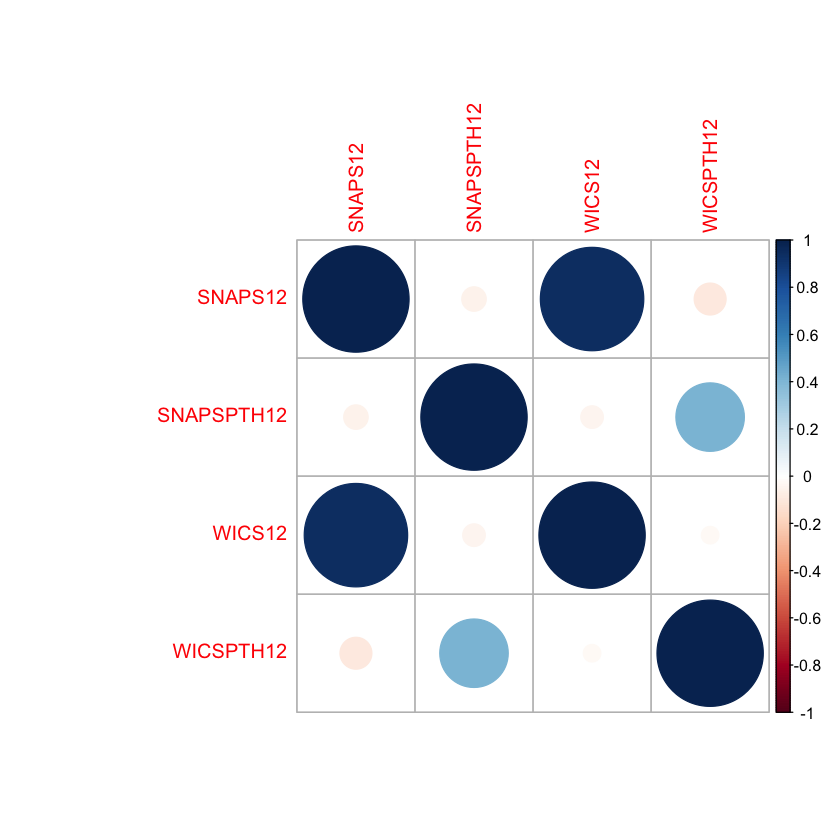

In [9]:
corrplot(matrix.cor)

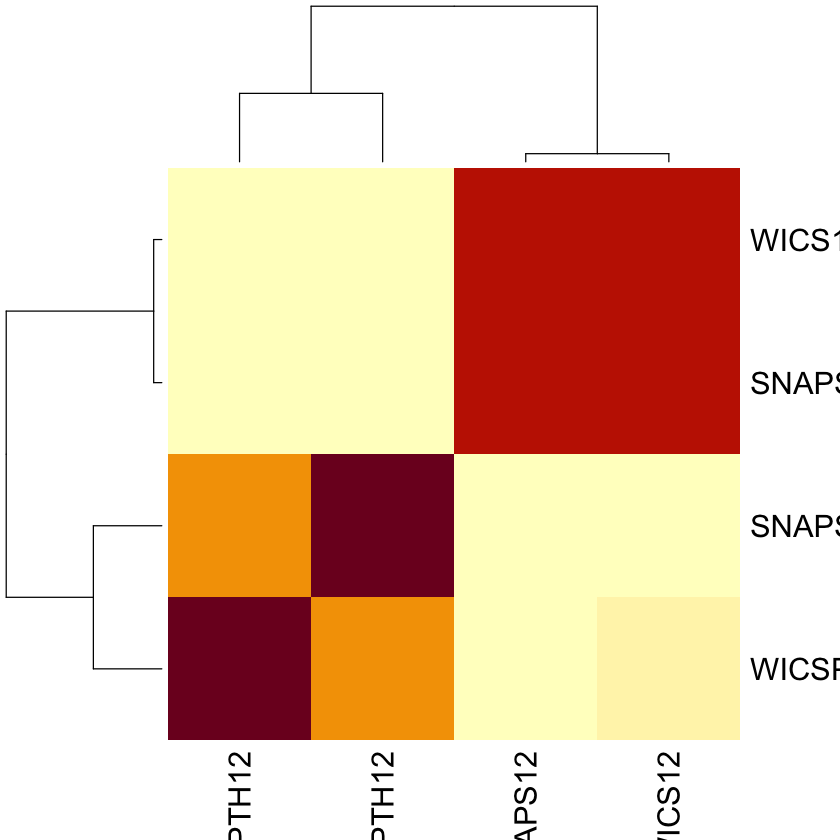

In [10]:
heatmap(x = matrix.cor)